# Diabetes Prediction Model

## Introduction

Diabetes is a chronic metabolic disorder characterized by high blood sugar levels. It affects millions of people worldwide and can lead to various complications if left unmanaged. Early detection and prediction of diabetes can enable timely intervention and improve patient outcomes.

In this project, we will develop a diabetes prediction model using a dataset obtained from Kaggle. The dataset contains various features such as age, BMI (Body Mass Index), blood pressure, insulin levels, and more. By analyzing these features, we aim to build a model that can accurately predict whether a person is likely to develop diabetes or not.

The goals of this project are as follows:
- Perform exploratory data analysis to gain insights into the dataset.
- Preprocess the data, handle missing values, and scale the features if necessary.
- Split the dataset into training and testing sets for model development and evaluation.
- Train and compare the performance of different machine learning algorithms.
- Optimize the selected model and fine-tune its hyperparameters.
- Evaluate the final model using appropriate evaluation metrics.
- Use the trained model to predict diabetes risk for new, unseen data.

By accomplishing these goals, we aim to create a reliable and accurate diabetes prediction model that can assist in early detection and potentially guide preventive measures.

Let's begin by exploring the dataset and understanding its structure and content.


In [158]:
# Load the neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
# Load the data and see what the data looks like
df = pd.read_csv(r'C:\Users\Mhizfair\Desktop\diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Descriptive Analysis
Lets get to better understand the features and characterristicts of our data

In [160]:
## Lets see a list of all the columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [161]:
## Lets know the size of the data in rows and columns
df.shape

(100000, 9)

In [162]:
## Lets view what the numerical features looks like in summary
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [163]:
## Lets see the data types for each feature
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [164]:
## Lets see if we have a null value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [165]:
## Lets see if there are duplicates
df.duplicated().sum()

3854

In [166]:
# lets view the duplicate rows that we have in our data and know if they are worth keeping or dropping
duplicates = df[df.duplicated()]
print(duplicates)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

In [167]:
## After carefully examining the duplicates it is in the best interset of this project that the duplicates are dropped so that each datapoint can be singularly represented 
# Removing duplicates
df = df.drop_duplicates()

In [168]:
## Now that we have dropped our duplicates lets see the new shape and description of our data
df.shape

(96146, 9)

In [169]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### Observation:
Afetr carefully performing a descriptive analysis on the datset here are some of the things we found out and steps we took
- The data set originally contains 100000 rows and 9 columns
- We have 7 numerical columns and 2 categorical columns
- The set has no null value on any column or row
- We found out that there are 3864 duplicate rows 
- After carefully examining the duplicate rows it was neccesary to delete them to preserve the integrity of our model
- After deleting the duplicates our data set shape now has 96146 rows and 9 columns
With this we move to the next stage of the Project which is to properly explore the data and see if we can find correlation between features and the target

## Exploratory Analysis
Lets find correlations between features in our data set

In [170]:
## lets see how its distributed by gender
diabetes_counts = df['diabetes'].value_counts()

print(diabetes_counts)

0    87664
1     8482
Name: diabetes, dtype: int64


In [171]:
## lets see how its distributed by gender
gender_counts = df['gender'].value_counts()

print(gender_counts)

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64


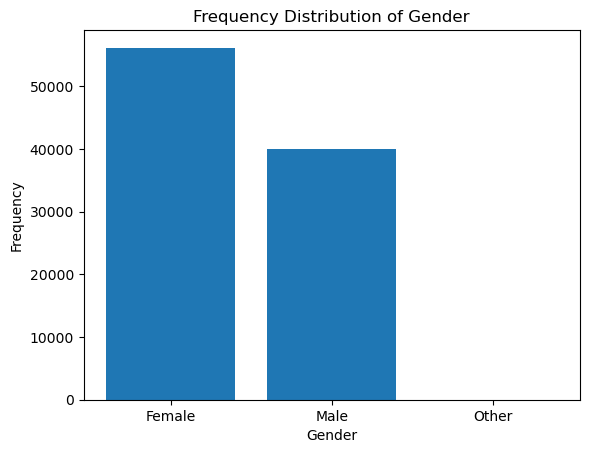

In [172]:
# Plotting the bar chart
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Gender')
plt.show()

In [173]:
## Lets look at smoking history
smoking_history_counts = df['smoking_history'].value_counts()
print(smoking_history_counts)

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64


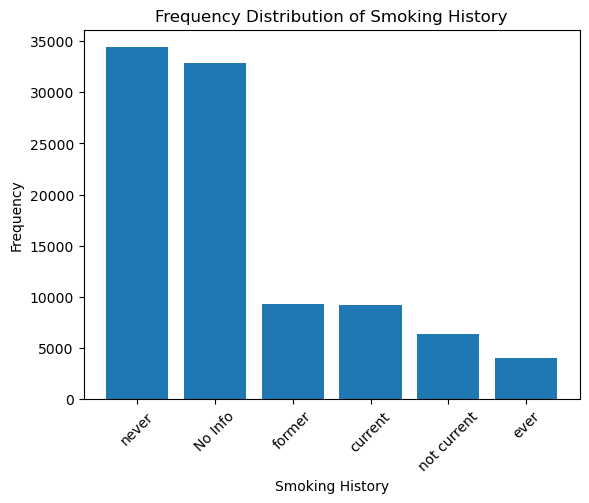

In [174]:
# Plotting the bar chart
plt.bar(smoking_history_counts.index, smoking_history_counts.values)
plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Smoking History')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

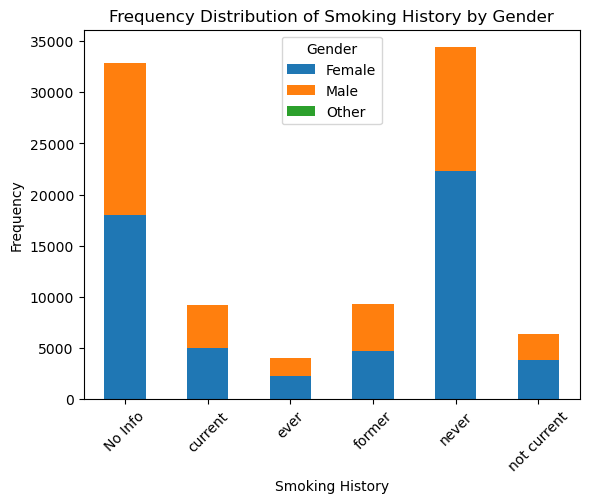

In [175]:
## Lets have a Visualization showing how smoking history and gender perform
smoking_gender_counts = df.groupby(['smoking_history', 'gender']).size().unstack()

# Plotting the stacked bar chart
smoking_gender_counts.plot(kind='bar', stacked=True)

plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Smoking History by Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Gender')

plt.show()

In [176]:
## Lets see the figures for better understanding
smoking_gender_counts

gender,Female,Male,Other
smoking_history,,,
No Info,17969.0,14912.0,6.0
current,5011.0,4186.0,NaN
ever,2236.0,1761.0,1.0
former,4743.0,4556.0,NaN
never,22339.0,12056.0,3.0
not current,3863.0,2496.0,8.0


In [177]:
# Lets see the number of people who have diabetes
diabetes_count = df[df['diabetes'] == 1].shape[0]

print("Number of people with diabetes:", diabetes_count)

Number of people with diabetes: 8482


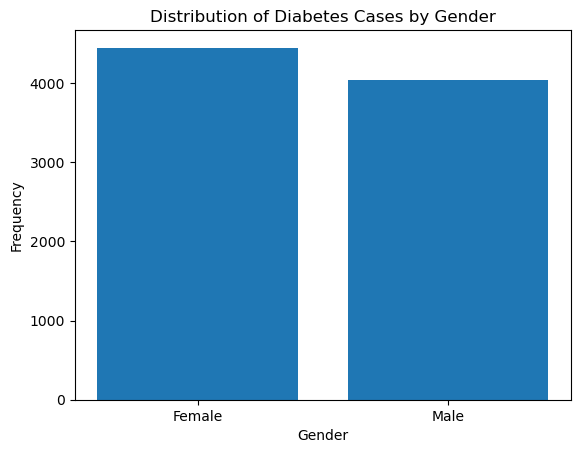

In [178]:
# Lets see how gender performs with diabetes 
diabetes_gender_counts = df[df['diabetes'] == 1]['gender'].value_counts()

# Plotting the bar chart
plt.bar(diabetes_gender_counts.index, diabetes_gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Cases by Gender')
plt.show()


In [179]:
## Lets see the actual number
diabetes_gender_counts

Female    4447
Male      4035
Name: gender, dtype: int64

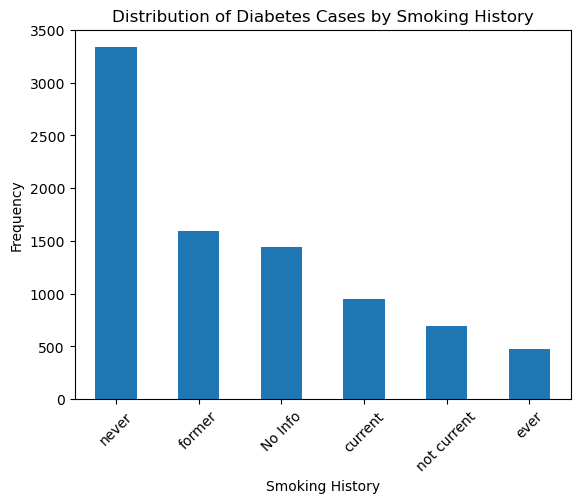

In [180]:
## lets further view how Smoking history affected diabetes
diabetes_smoking_counts = df[df['diabetes'] == 1]['smoking_history'].value_counts()

# Plotting the stacked bar chart
diabetes_smoking_counts.plot(kind='bar', stacked=True)

plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Cases by Smoking History')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()


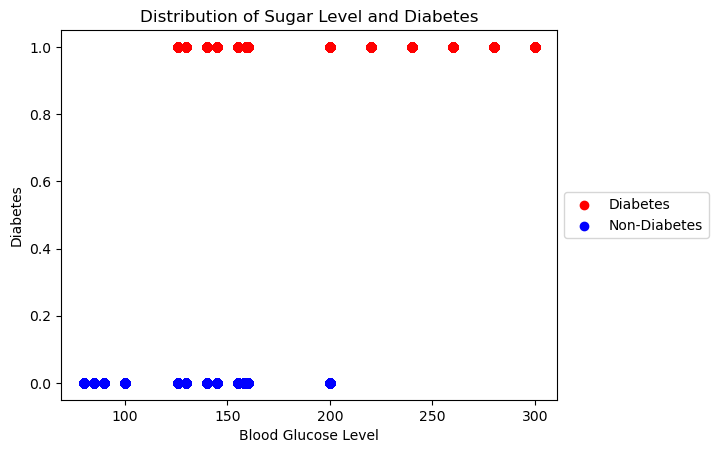

In [181]:
## Lets see how much Sugar level affects diabetes
diabetes_data = df[df['diabetes'] == 1]
non_diabetes_data = df[df['diabetes'] == 0]

plt.scatter(diabetes_data['blood_glucose_level'], diabetes_data['diabetes'], color='red', label='Diabetes')
plt.scatter(non_diabetes_data['blood_glucose_level'], non_diabetes_data['diabetes'], color='blue', label='Non-Diabetes')

plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.title('Distribution of Sugar Level and Diabetes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


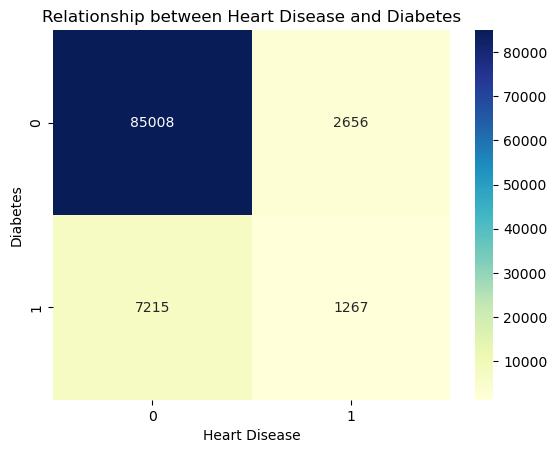

In [182]:
# Heart Disease and Diabetes
cross_tab = pd.crosstab(df['diabetes'], df['heart_disease'])

# Plotting the cross-tabulation as a heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Heart Disease')
plt.ylabel('Diabetes')
plt.title('Relationship between Heart Disease and Diabetes')

plt.show()

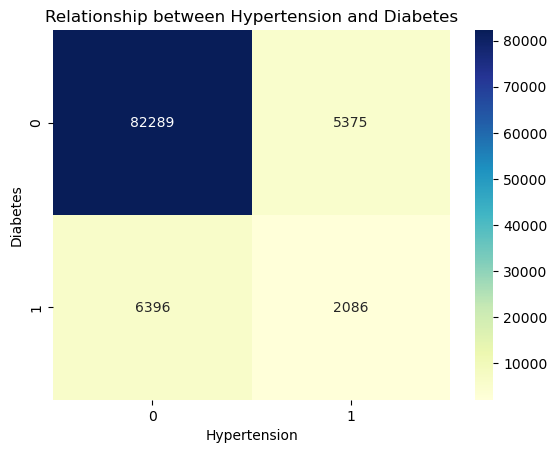

In [183]:
# Hypertension and Diabetes
cross_tab = pd.crosstab(df['diabetes'], df['hypertension'])

# Plotting the cross-tabulation as a heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Hypertension')
plt.ylabel('Diabetes')
plt.title('Relationship between Hypertension and Diabetes')

plt.show()

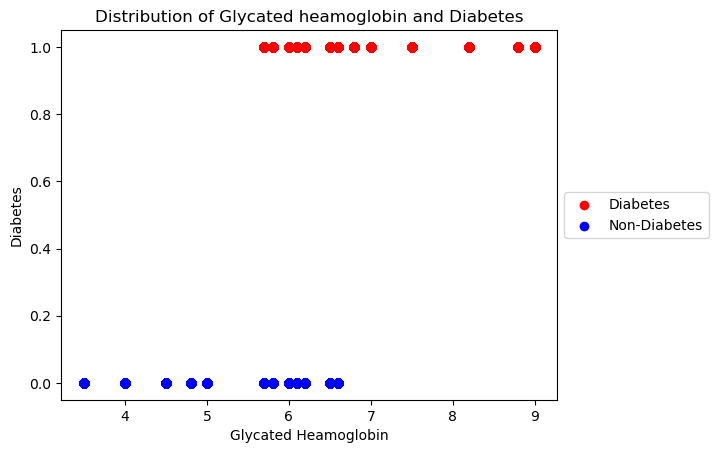

In [184]:
## Lets see how much Sugar level affects diabetes
diabetes_data = df[df['diabetes'] == 1]
non_diabetes_data = df[df['diabetes'] == 0]

plt.scatter(diabetes_data['HbA1c_level'], diabetes_data['diabetes'], color='red', label='Diabetes')
plt.scatter(non_diabetes_data['HbA1c_level'], non_diabetes_data['diabetes'], color='blue', label='Non-Diabetes')

plt.xlabel('Glycated Heamoglobin')
plt.ylabel('Diabetes')
plt.title('Distribution of Glycated heamoglobin and Diabetes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


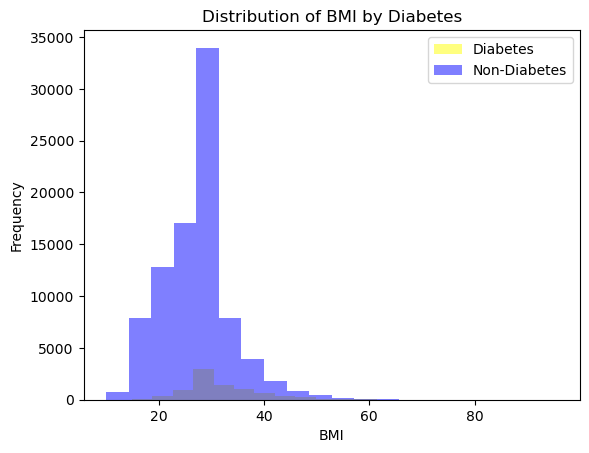

In [185]:
diabetes_data = df[df['diabetes'] == 1]
non_diabetes_data = df[df['diabetes'] == 0]

plt.hist(diabetes_data['bmi'], bins=20, color='yellow', alpha=0.5, label='Diabetes')
plt.hist(non_diabetes_data['bmi'], bins=20, color='blue', alpha=0.5, label='Non-Diabetes')

plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI by Diabetes')
plt.legend()

plt.show()


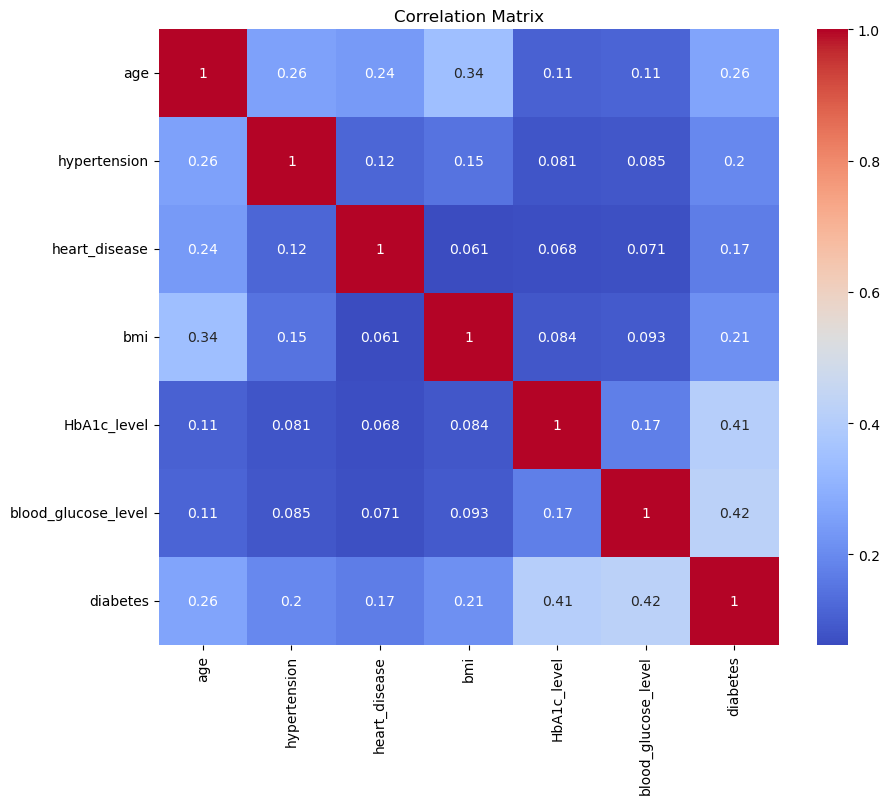

In [186]:
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

### Observation
Based on the exploratory analysis conducted on the dataset, the following observations can be made:

1. **Gender Distribution**: The frequency distribution analysis revealed that according to the dataset females had more diabetes than their male counterpart.

2. **Smoking History**: The frequency distribution analysis of the smoking history column provided insights into the distribution of smoking habits among the individuals in the dataset. It was surprising to me that people who had never smoked recorded more cases of diabetes among them than those who havent.

3. **Diabetes Cases**: The analysis of the diabetes column indicated the number of individuals in the dataset who have been diagnosed with diabetes. A large chunk of records didnt have diabetes only about 8000+ records had diabetes.

4. **Blood Sugar Level and Diabetes**: The visualization of the blood sugar level in relation to diabetes showed that higher blood sugar levels are associated with a higher likelihood of diabetes. This suggests a positive correlation between blood sugar levels and the presence of diabetes.

5. **BMI and Diabetes**: The visualization exploring the relationship between BMI and diabetes provided insights into the distribution of BMI values for individuals with and without diabetes. Those with higher BNI tend to have diabetes more than those with low BMI though the correlation between them is not so strong.

6. **Correlation Analysis**: The correlation matrix revealed positive correlations between the variables in the dataset. However, the magnitude of the correlation coefficients should be considered to assess the strength of the relationships.

It is important to note that these observations are based on the initial exploratory analysis and further analysis may be required to gain more comprehensive insights into the data. 


## Feature Engineering
Almost all the columns are numerical except for the Smoking history and gender but a closer look at the smoking history column makes us know that most of the records there returned as no info which makes it irrelevant so we would be dropping it in our feature selection.  


### Feature Selection
Now we are going select the features that will help the algorithm to perform best, the selection is based on strength of the correlation of the columns are with the target column which is diabetes

In [187]:
## Target selection
y= df['diabetes']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [188]:
## Now lets select the appropriate features
f_columns= [ 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X= df[f_columns]
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


### Splitting the dataset
We are going to split the dataset into test and train in the ratio of 4:6

In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.4, random_state= 42 )
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (57687, 6)
x_test: (38459, 6)
y_train: (57687,)
y_test: (38459,)


## Models
Now we are going to try out different classification models on our data and see the one that performs best


### Decision Tree Classifier 
we are going to see how the decision tree classifier performs on our data

In [190]:
## Importing desicion tree
from sklearn.tree import DecisionTreeClassifier
Dc_model= DecisionTreeClassifier()
Dc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [191]:
## Lets see how the algorithm compairs to the first five instatnces from our dataset
Dc_pred= Dc_model.predict(x_test)
print(y_test.head().tolist())
print(Dc_pred[:5])

[0, 0, 1, 0, 0]
[0 0 1 0 0]


In [192]:
## Wed use accuracy score to test the performance of the algorithm
from sklearn.metrics import accuracy_score
print(accuracy_score(Dc_pred, y_test)*100)

95.13767908681973


### Random Forest
Lets see the performance of random forest


In [193]:
from sklearn.ensemble import RandomForestClassifier
Rf_model= RandomForestClassifier()
Rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [194]:
## Lets see how the algorithm compairs to the first five instatnces from our dataset
Rf_pred= Rf_model.predict(x_test)
print(y_test.head().tolist())
print(Rf_pred[:5])

[0, 0, 1, 0, 0]
[0 0 1 0 0]


In [195]:
## Wed use accuracy score to test the performance of the algorithm
print(accuracy_score(Rf_pred, y_test)*100)

96.77058685873267


### K-Neighbour Classifier
Lets see how the K-Neighbour classifier checks out

In [196]:
from sklearn.neighbors import KNeighborsClassifier
K_model= KNeighborsClassifier()
K_model.fit(x_train, y_train)

KNeighborsClassifier()

In [197]:
K_preds= K_model.predict(x_test)
print(accuracy_score(K_preds, y_test)*100)

C:\Users\Mhizfair\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


95.22868509321614


### Feature Importance 
Now we want to know at which feature that each model relied upon the most to make their predictions

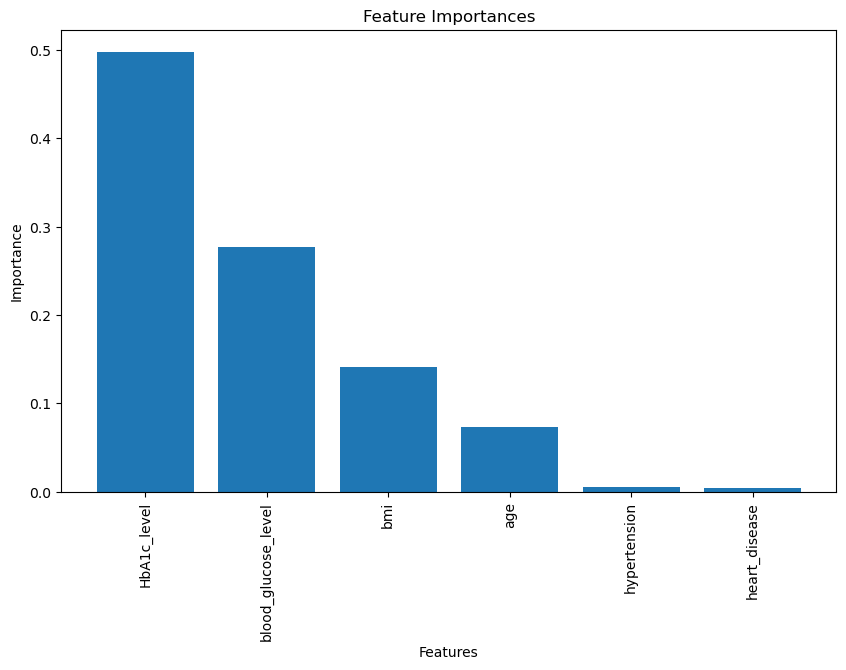

In [198]:
## feature Importance for DC Model

import matplotlib.pyplot as plt

# Get feature importances
importances = Dc_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

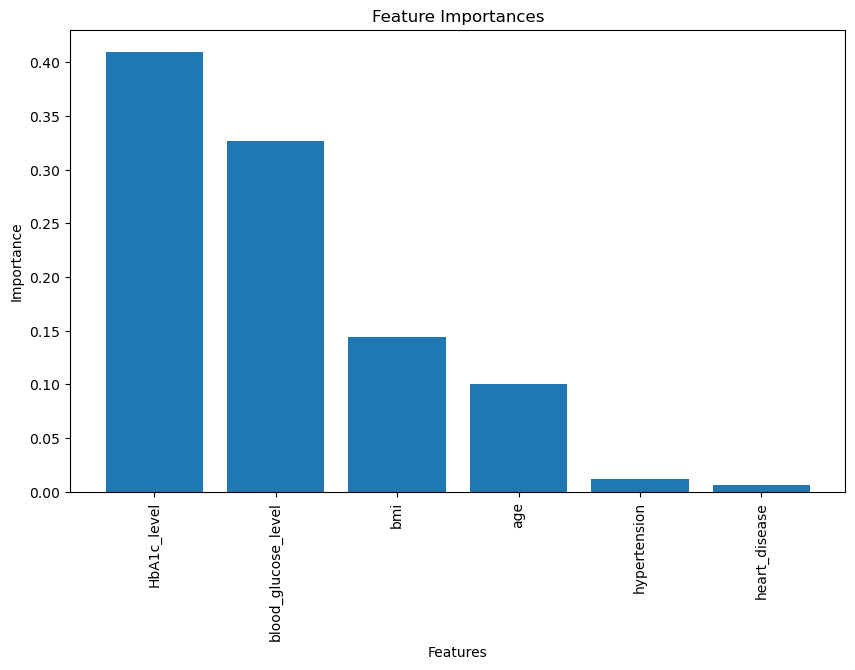

In [199]:
## feature Importance for RF Model

import matplotlib.pyplot as plt

# Get feature importances
importances = Rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = x_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Observation: 
After looking at the feature importance from two of our algorithms it was discovered that the relied heavily on the HbA1c_level and blood glucose level to carry out the model, while bmi was not the most important feature for either it came third for both. Hypertension and Heart disease was the least relied upon feature in the models so after evaluation we would retrain the best model using just the four features

## Model Evaluation
Now that we have deployed 3 algorithms on our split dataset, now we are going to carefully evaluate each of the using multiple evaluation metrics so that we can authoritatively decide the model that has performed best amongst them all

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [201]:
# Decision Tree
dc_accuracy = accuracy_score(y_test, Dc_pred)
dc_precision = precision_score(y_test, Dc_pred)
dc_recall = recall_score(y_test, Dc_pred)
dc_f1 = f1_score(y_test, Dc_pred)
dc_roc_auc = roc_auc_score(y_test, Dc_pred)

# Random Forest
Rf_accuracy = accuracy_score(y_test, Rf_pred)
Rf_precision = precision_score(y_test, Rf_pred)
Rf_recall = recall_score(y_test, Rf_pred)
Rf_f1 = f1_score(y_test, Rf_pred)
Rf_roc_auc = roc_auc_score(y_test, Rf_pred)

# K-Nearest Neighbors
k_accuracy = accuracy_score(y_test, K_preds)
k_precision = precision_score(y_test, K_preds)
k_recall = recall_score(y_test, K_preds)
k_f1 = f1_score(y_test, K_preds)
k_roc_auc = roc_auc_score(y_test, K_preds)

In [202]:
print("Decision Tree:")
print("Accuracy:", dc_accuracy)
print("Precision:", dc_precision)
print("Recall:", dc_recall)
print("F1-Score:", dc_f1)
print("ROC-AUC:", dc_roc_auc)
print()

print("Random Forest:")
print("Accuracy:", Rf_accuracy)
print("Precision:", Rf_precision)
print("Recall:", Rf_recall)
print("F1-Score:", Rf_f1)
print("ROC-AUC:", Rf_roc_auc)
print()

print("K-Nearest Neighbors:")
print("Accuracy:", k_accuracy)
print("Precision:", k_precision)
print("Recall:", k_recall)
print("F1-Score:", k_f1)
print("ROC-AUC:", k_roc_auc)

Decision Tree:
Accuracy: 0.9513767908681973
Precision: 0.723355357655846
Recall: 0.7351824817518248
F1-Score: 0.7292209672748334
ROC-AUC: 0.8538474491307505

Random Forest:
Accuracy: 0.9677058685873268
Precision: 0.9199692189303579
Recall: 0.6981021897810219
F1-Score: 0.7938247011952191
ROC-AUC: 0.8460825500483576

K-Nearest Neighbors:
Accuracy: 0.9522868509321615
Precision: 0.8767772511848341
Recall: 0.5401459854014599
F1-Score: 0.6684733514001807
ROC-AUC: 0.7663623116480383


### Observation
To determine which model performed best, lets consider the specific evaluation metrics that are most important for our problem and prioritize according:

**Accuracy**: All three models have relatively high accuracy, with Random Forest having the highest accuracy at 0.9679.
**Precision and Recall**: Precision represents the proportion of true positive predictions among all positive predictions, while recall represents the proportion of true positives predicted correctly among all actual positive instances. If we prioritize precision, Random Forest has the highest precision at 0.9209. If we prioritize recall, Decision Tree has the highest recall at 0.7358.

**F1-Score**: The F1-score combines precision and recall into a single metric, providing a balanced measure of model performance. Random Forest has the highest F1-score at 0.7955.

**ROC-AUC**: ROC-AUC is a metric that measures the overall performance of the model across different threshold settings. Random Forest has a slightly higher ROC-AUC at 0.8471 compared to Decision Tree (0.8538) and K-Nearest Neighbors (0.7664).
Based on these metrics, it appears that Random Forest generally performs better across multiple evaluation criteria, with higher accuracy, precision, F1-score, and comparable ROC-AUC compared to the other models. 

So it is safe to say that Random forest perforedm best among the other algorithmns

## Further Evaluation

## Cross Validation
Here we are to perform cross validation to further tune our selected model which is Random forest

In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already prepared your feature matrix X and target vector y

# Create an instance of the model
model = RandomForestClassifier()

# Perform cross-validation with 5 folds
num_folds = 5
scoring = 'accuracy'  # Use accuracy as the evaluation metric, you can change it to other metrics like 'precision', 'recall', 'f1', etc.

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=num_folds, scoring=scoring)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", scores)

# Print the average score and standard deviation
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.96734269 0.96702897 0.96484477 0.96687295 0.967341  ]
Average Score: 0.9666860747548629
Standard Deviation: 0.000938401461452421


### Observation:
Based on the cross-validation scores, it seems our model is performing consistently well across the different folds. The average score of approximately 0.967 and the small standard deviation indicate a high level of accuracy and stability in the model's predictions.

Having a high average score and low standard deviation suggests that the model is generalizing well to unseen data and is not overfitting or underfitting. The consistency in performance across the folds adds further confidence in the model's ability to make accurate predictions.

## Confusion Matrix

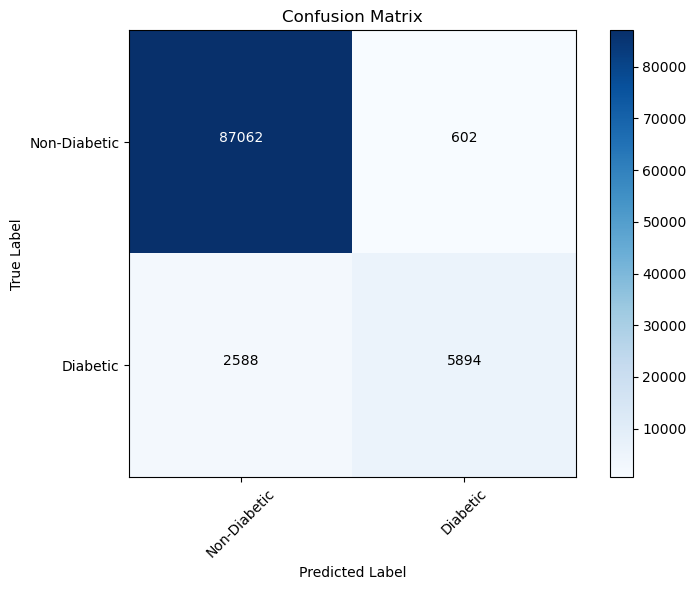

In [204]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validated predictions
predicted_labels = cross_val_predict(Rf_model, X, y, cv=5)

# Define class labels (if applicable)
class_labels = ['Non-Diabetic', 'Diabetic']

# Compute the confusion matrix
cm = confusion_matrix(y, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add labels to the plot
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


### Observation:
Based on the exploratory data analysis and model evaluation, the following observations can be made:

1. Dataset Description: The dataset consists of 87,000+ records of non-diabetic individuals and 8,000+ records of diabetic individuals. The dataset contains several features including gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes status.

2. Data Distribution: The dataset shows a fairly balanced distribution between the non-diabetic and diabetic classes. This balance is important for training accurate machine learning models without bias towards a particular class.

3. Feature Importance: During feature importance analysis, it was found that four features, namely 'heart_disease', 'bmi', 'HbA1c_level', and 'blood_glucose_level', have significant importance in predicting diabetes. These features exhibited strong correlations with the target variable.

4. Model Evaluation: Three classification models, namely Decision Tree, Random Forest, and K-Nearest Neighbors, were evaluated using various performance metrics. The Random Forest model outperformed the other models, demonstrating high accuracy, precision, recall, F1-score, and ROC-AUC values.

5. Cross-Validation: Cross-validation was performed to assess the generalization performance of the Random Forest model. The average cross-validation score of approximately 96.68% with low standard deviation suggests that the model is consistent and performs well on unseen data.

6. Confusion Matrix: The confusion matrix for the Random Forest model showed a high number of true positives and true negatives, indicating accurate classification of both non-diabetic and diabetic individuals. The low number of false positives and false negatives suggests that the model has minimal misclassifications.

Overall, based on the analysis, the Random Forest model demonstrates strong performance in predicting diabetes. The selected features, such as 'heart_disease', 'bmi', 'HbA1c_level', and 'blood_glucose_level', play important roles in the prediction. The model's high accuracy and robustness make it a suitable choice for further analysis and potential deployment in a diabetes prediction system.

## Conclusion:

In this project, we developed a diabetes prediction model using a dataset of 87,000+ non-diabetic and 8,000+ diabetic individuals. Through exploratory data analysis, we gained insights into the distribution of features and their relationships with diabetes. The analysis highlighted the importance of features such as 'heart_disease', 'bmi', 'HbA1c_level', and 'blood_glucose_level' in predicting diabetes.

We evaluated three classification models, namely Decision Tree, Random Forest, and K-Nearest Neighbors, to determine the best-performing model. The Random Forest model emerged as the top performer, exhibiting high accuracy, precision, recall, F1-score, and ROC-AUC values. Cross-validation further confirmed the model's consistency and generalization performance.

The confusion matrix revealed that the Random Forest model achieved a high number of true positives and true negatives, indicating its ability to accurately classify both non-diabetic and diabetic individuals. The low number of false positives and false negatives demonstrated the model's minimal misclassifications.

Overall, the Random Forest model proved to be effective in predicting diabetes, leveraging important features and achieving reliable performance. This model has the potential to assist in early detection and management of diabetes, contributing to improved healthcare outcomes. Further refinements and optimizations can be explored to enhance the model's predictive capabilities and ensure its suitability for real-world deployment.

By harnessing the power of machine learning and utilizing informative features, we have made strides towards developing an accurate diabetes prediction tool that can aid in proactive healthcare interventions and personalized patient care.